In [6]:
'''
QUESTION 1
'''
import pandas as pd
# importing the datasets
df1 = pd.read_csv('Olympics_dataset1.csv')
df2 = pd.read_csv('Olympics_dataset2.csv')

# merging the datasets
df = pd.merge(left=df1, right=df2, on=None, left_on='Team', right_on='Team')

# dropping the first row of the datasets
df.drop(df.index[0], inplace=True)

# dropping the unsued columns
df.drop(['Combined Total', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',], axis='columns', inplace=True)

# creating a dict to map the renaming of columns
rename_dict = {
    "Team": "Country",
    "Unnamed: 1": "summer_rubbish",
    "Summer Games": "summer_participation",
    "Unnamed: 3_x": "summer_gold",
    "Unnamed: 4_x": "summer_silver",
    "Unnamed: 5_x": "summer_bronze",
    "Unnamed: 6": "summer_total",
    "Winter Games": "winter_participation",
    "Unnamed: 2": "winter_gold",
    "Unnamed: 3_y": "winter_silver",
    "Unnamed: 4_y": "winter_bronze",
    "Unnamed: 5_y": "winter_total",
}

# renaming the columns
df.rename(columns=rename_dict, inplace=True)

# removing the 'Totals' row from the dataframe
df = df[df.Country != 'Totals']
#df.drop(df.index[df.shape[0]-1], inplace=True)

# printing first five rows of dataframe
print(df.head().to_string())

'''
QUESTION 2
'''

# function for removing the words in brackets
def remove_words_in_brackets(cell):
    for i in range(len(cell)):
        if cell[i] == '(':
            return cell[:i]
    return cell

# removing words in brackets
df['Country'] = df['Country'].map(remove_words_in_brackets)

# setting index as Country
df.set_index('Country', inplace=True)

# removing the undesired columns
df.drop(['summer_rubbish', 'summer_total', 'winter_total'], axis='columns', inplace=True)

# printing the data
df.head().to_string()

'''
QUESTION 3
'''

# dropping rows with na values
df.dropna(how='all', inplace=True)

# printing values
df.tail(10).to_string()


'''
QUESTION 4
'''

# function for casting string to integer
def convert_int(n):
    if ',' in n:
        n = n.replace(',', '')
        return int(n)
    else:
        return int(n)

# converting string into numbers
df['summer_gold'] = df['summer_gold'].map(convert_int)

# printing the country with max gold
df[df['summer_gold'] == df['summer_gold'].max()].index[0]

# converting string into numbers
df['winter_gold'] = df['winter_gold'].map(convert_int)

# finding the max difference
max_diff = abs(df['winter_gold'] - df['summer_gold']).max()

# finding the name of the country
print(df[abs(df['winter_gold'] - df['summer_gold']) == max_diff].index[0], max_diff)
'''
QUESTION 6
'''
# changing the str values to numberic values
df['summer_silver'] = df['summer_silver'].map(convert_int)
df['summer_bronze'] = df['summer_bronze'].map(convert_int)
df['winter_silver'] = df['winter_silver'].map(convert_int)
df['winter_bronze'] = df['winter_bronze'].map(convert_int)

# creating a new column with sum of all medals
df['total'] = df['summer_gold'] + df['summer_silver'] + df['summer_bronze'] + df['winter_gold'] + df['winter_silver'] + df['winter_bronze']

# printing the values
print(df.sort_values(by='total', ascending=False).head().to_string())
print(df.sort_values(by='total', ascending=False).tail().to_string())

# convert participation from string to int
df['summer_participation'] = df['summer_participation'].map(convert_int)

# make a new column in dataframe with the rule
df['rate_summer'] = (df['summer_gold']*5 + df['summer_silver']*3 + df['summer_bronze'])/df['summer_participation']

# changing the NaN from  the above transformation to 0
df.loc[df['summer_participation'] == 0, 'rate_summer'] = 0


                    Country summer_rubbish summer_participation summer_gold summer_silver summer_bronze summer_total winter_participation winter_gold winter_silver winter_bronze winter_total
1         Afghanistan (AFG)            BLA                   14           0             0             2            2                    0           0             0             0            0
2             Algeria (ALG)            BLA                   13           5             4             8           17                    3           0             0             0            0
3           Argentina (ARG)            BLA                   24          21            25            28           74                   19           0             0             0            0
4             Armenia (ARM)            BLA                    6           2             6             6           14                    7           0             0             0            0
5   Australasia (ANZ) [ANZ]            BLA   

In [7]:
# convert participation from string to int
df['winter_participation'] = df['winter_participation'].map(convert_int)


In [8]:
# make a new column in dataframe with the rule
df['rate_winter'] = (df['winter_gold']*5 + df['winter_silver']*3 + df['winter_bronze'])/df['winter_participation']

# changing the NaN from  the above transformation to 0
df.loc[df['winter_participation'] == 0, 'rate_winter'] = 0


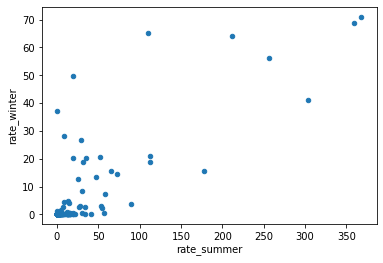

In [9]:
df.plot.scatter(x='rate_summer', y='rate_winter')

In [11]:
continents_df = pd.read_csv('Countries-Continents.csv')

In [33]:
df_joined

,summer_participation,summer_gold,summer_silver,summer_bronze,winter_participation,winter_gold,winter_silver,winter_bronze,total,rate_summer,rate_winter,Continent,Country
0,14,0,0,2,0,0,0,0,2,0.142857,0.000000,Asia,Afghanistan
1,13,5,4,8,3,0,0,0,17,3.461538,0.000000,Africa,Algeria
2,24,21,25,28,19,0,0,0,74,8.666667,0.000000,South America,Argentina
3,6,2,6,6,7,0,0,0,14,5.666667,0.000000,Europe,Armenia
4,2,3,4,5,0,0,0,0,12,16.000000,0.000000,NaN,Australasia
5,26,147,163,187,19,5,5,5,512,54.269231,2.368421,Oceania,Australia
6,27,18,33,36,23,64,81,87,319,8.333333,28.260870,Europe,Austria
7,6,7,11,25,6,0,0,0,43,15.500000,0.000000,Europe,Azerbaijan
8,16,6,2,6,0,0,0,0,14,2.625000,0.000000,North America,Bahamas
9,9,2,1,0,0,0,0,0,3,1.444444,0.000000,Asia,Bahrain


In [23]:
# merging the datasets
df_joined = pd.merge(left=df, right=continents_df, on=None, left_on=df.index.str.strip(), right_on='Country', how='left')


In [28]:
list_of_continents = continents_df['Continent'].unique().tolist()
list_of_colors = ['green','orange','brown','dodgerblue','red', 'yellow']

In [29]:
list_of_tuples = list(zip(list_of_continents, list_of_colors)) 

In [30]:
list_of_tuples

[('Africa', 'green'),
 ('Asia', 'orange'),
 ('Europe', 'brown'),
 ('North America', 'dodgerblue'),
 ('Oceania', 'red'),
 ('South America', 'yellow')]

In [31]:
df_colors = pd.DataFrame(list_of_tuples, columns = ['Continent', 'Color']) 

In [32]:
df_colors

,Continent,Color
0,Africa,green
1,Asia,orange
2,Europe,brown
3,North America,dodgerblue
4,Oceania,red
5,South America,yellow


In [35]:
# merging the datasets
df_colored = pd.merge(left=df_joined, right=df_colors, on=None, left_on='Continent', right_on='Continent', how='left')
df_colored['Color'].fillna('grey', inplace=True)
df_colored

,summer_participation,summer_gold,summer_silver,summer_bronze,winter_participation,winter_gold,winter_silver,winter_bronze,total,rate_summer,rate_winter,Continent,Country,Color
0,14,0,0,2,0,0,0,0,2,0.142857,0.000000,Asia,Afghanistan,orange
1,13,5,4,8,3,0,0,0,17,3.461538,0.000000,Africa,Algeria,green
2,24,21,25,28,19,0,0,0,74,8.666667,0.000000,South America,Argentina,yellow
3,6,2,6,6,7,0,0,0,14,5.666667,0.000000,Europe,Armenia,brown
4,2,3,4,5,0,0,0,0,12,16.000000,0.000000,NaN,Australasia,grey
5,26,147,163,187,19,5,5,5,512,54.269231,2.368421,Oceania,Australia,red
6,27,18,33,36,23,64,81,87,319,8.333333,28.260870,Europe,Austria,brown
7,6,7,11,25,6,0,0,0,43,15.500000,0.000000,Europe,Azerbaijan,brown
8,16,6,2,6,0,0,0,0,14,2.625000,0.000000,North America,Bahamas,dodgerblue
9,9,2,1,0,0,0,0,0,3,1.444444,0.000000,Asia,Bahrain,orange


No handles with labels found to put in legend.


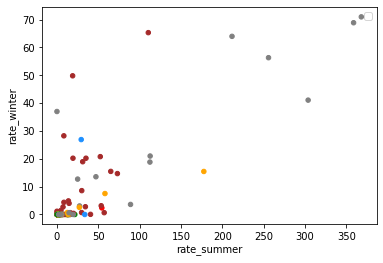

In [56]:
df_colored.plot.scatter(x='rate_summer', y='rate_winter', c=df_colored['Color']).legend()

In [67]:
af = df_colored.loc[df_colored['Continent'] == 'Africa']

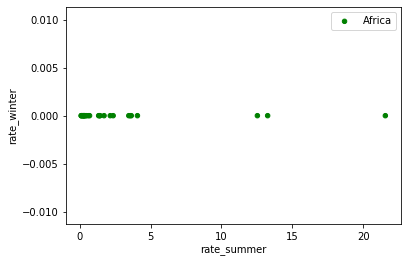

In [71]:
import matplotlib.pyplot as plt

In [72]:
plt.af.plot.scatter(x='rate_summer', y='rate_winter', c=af['Color'], label='Asia')

AttributeError: 'AxesSubplot' object has no attribute 'af'